# Imports and Global Parameters

In [1]:
#General functions
import numpy as np #Calculations
import os #File operations
from scipy import stats #Statistics
from tqdm import tqdm #Progress bar

#FITS file operations
from astropy.io import fits

#Fitting
from astropy.modeling import models, fitting

#Utilities
import matplotlib.pyplot as plt #Plotting
from matplotlib import rc, rcParams, cm, gridspec

# global settings of plots DO NOT CHANGE
medium_fontsize = 25
font = {'size': medium_fontsize, 'family': 'sans-serif', 'weight': 'bold'}
rc('font', **font)
rcParams['axes.linewidth'] = 1.5
rcParams['xtick.major.width'] = 1.5
rcParams['ytick.major.width'] = 1.5

# global color definitions
violet = (95 / 255.0, 0.0, 100 / 255.0, 1.0)
blue = (50 / 255.0, 98 / 255.0, 150 / 255.0, 1.0)
green = (85 / 255.0, 173 / 255.0, 57 / 255.0, 1.0)
yellow = (250 / 255.0, 179 / 255.0, 0.0, 1.0)
red = (250 / 255.0, 0.0, 0.0, 1.0)
black = (0.0, 0.0, 0.0, 1.0)


# plot settings
latex = True                                     # boolean                # enable the use of latex
output_type = 'pdf'                              # 'pdf', 'png'           # type of the plot files

####################################################################################################

if latex:
    rcParams['text.usetex'] = True
    rcParams['text.latex.preamble'] = r'\usepackage{amsmath}\usepackage{upgreek}\usepackage{sansmath}\sansmath'

####################################################################################################


In [ ]:
# Have these in the individual plots

ax.set_xlabel(x_label, fontweight='bold')
ax.set_ylabel(y_label, fontweight='bold')
# ax.set_title(plot_title, fontweight='bold')
ax.legend(loc='best')
plt.tight_layout()
plt.savefig('NAME.' + output_type, format=output_type)
plt.show()

# Camera Characterisation

## OSG

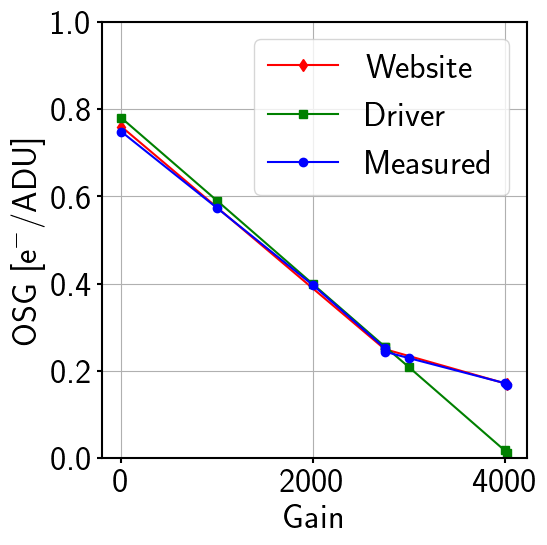

In [39]:
#OSG-Gain

#Read computed OSG and Gains
gainOsg = np.load('../Results/Gain-OSG-up-down.npy')
gainRange = gainOsg[0].astype(int)
OSG = gainOsg[1]
conf_up = gainOsg[2]
conf_down = gainOsg[3]

#Values from camera driver
OSG_driver = np.empty(len(gainRange))
for i, gain in enumerate(gainRange):
    filename = '../Data/2024-05-09/SysGain/Gain' + str(gain) + '/OSGain' + str(gain) + '_0000.fits'
    if gain == 0:
        filename = '../Data/2024-05-09/SysGain/Gain0/OSGain0000_0000.fits'
    with fits.open(filename) as hdul:
        header = hdul[0].header
        OSG_driver[i] = header['GAIN']

#Values from Website
OSG_website = np.array([0.76, 0.25, 0.25, 0.17])
gainRange_website = np.array([0, 2749, 2750, 4030])

#Plot
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(gainRange_website, OSG_website,'-dr', label='Website')
ax.plot(gainRange, OSG_driver, '-sg', label='Driver')
ax.plot(gainRange, OSG, '-ob', label='Measured')
#ax.plot(gainRange, conf_up, '--', color=blue, alpha=0.5) #Commented out for better visibility
#ax.plot(gainRange, conf_down, '--', color=blue, alpha=0.5)
ax.set_xlabel('Gain', fontweight='bold')
ax.set_ylabel('OSG [e$^-$/ADU]', fontweight='bold')
ax.legend(loc='best')
ax.set_ylim(0, 1)
plt.grid()
plt.tight_layout()
plt.savefig('../Results/OSG-Gain-comp.' + output_type, format=output_type)
plt.show()

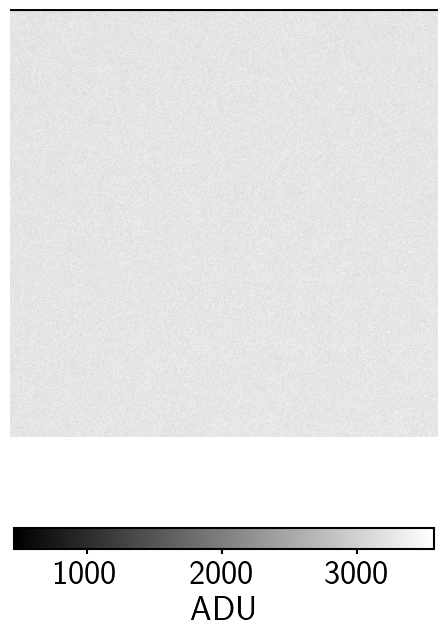

In [19]:
# Example frame from OSGain 0

filename = '../Data/2024-05-09/SysGain/Gain0/OSGain0000_0000.fits'
with fits.open(filename) as hdul:
    data = hdul[0].data
    header = hdul[0].header

fig, ax = plt.subplots(figsize=(6, 7))
cax = ax.imshow(data, cmap='gray', origin='lower')
cbar = fig.colorbar(cax, shrink=0.8, location='bottom')
cbar.set_label('ADU', fontweight='bold')
plt.axis('off')
plt.tight_layout()
plt.savefig('../Results/OSGain0-ExFrame.' + output_type, format=output_type)
plt.show()


## Dark Current

<>:32: SyntaxWarning: invalid escape sequence '\c'
<>:32: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_171135/1697719828.py:32: SyntaxWarning: invalid escape sequence '\c'
  ax2.set_xlabel('Temperature [$^\circ$C]', fontweight='bold')


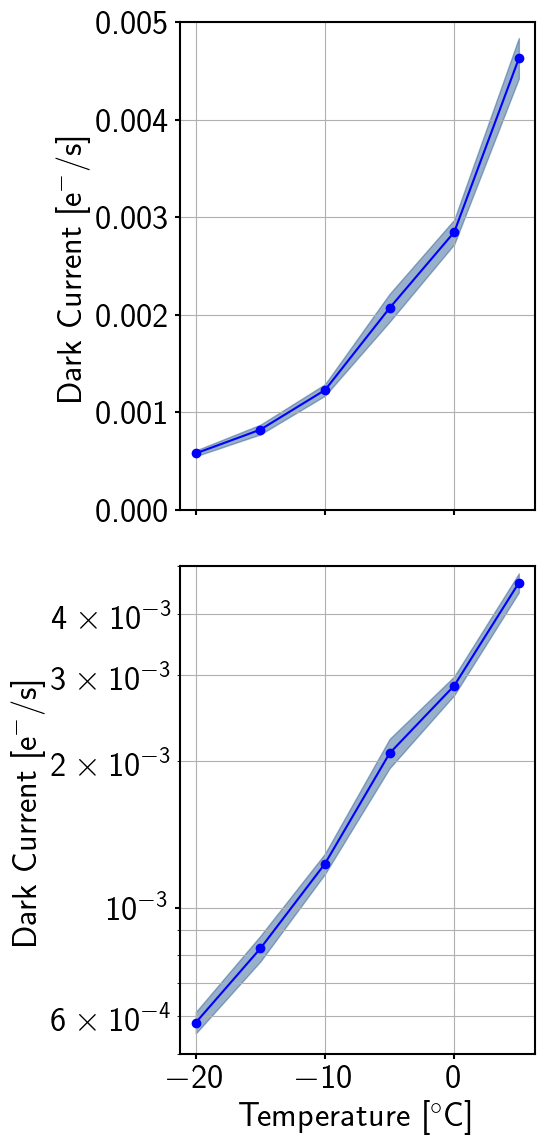

In [11]:
# Dark Current
# Recreation of the plots already in the development notebook, this time formated nicely

#Read computed dark current
data = np.load('../Results/temps-DarkCurr-Up-Down.npy')
temps = data[0] #Temperatures in Celsius
dark_current = data[1] #Dark current in e-/s
dc_up = data[2] #Upper confidence interval (95%)
dc_down = data[3] #Lower confidence interval

#Linear plot
fig = plt.figure(figsize=(6, 12))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])
ax1 = plt.subplot(gs[0])

ax1.plot(temps, dark_current, '-ob')
ax1.fill_between(temps, dc_up, dc_down, color=blue, alpha=0.5)
#ax1.set_xlabel('Temperature [$^\circ$C]', fontweight='bold')
ax1.set_xticklabels([])
ax1.set_ylabel('Dark Current [e$^-$/s]', fontweight='bold')
ax1.set_ylim(0, 0.005)
ax1.grid()
#This is in case you want two separate plots
#plt.tight_layout()
#plt.savefig('../Results/DarkCurr-Temp-Lin.' + output_type, format=output_type)
#plt.show()

#Logarithmic plot
ax2 = plt.subplot(gs[1])
ax2.semilogy(temps, dark_current, '-ob')
ax2.fill_between(temps, dc_up, dc_down, color=blue, alpha=0.5)
ax2.set_xlabel('Temperature [$^\circ$C]', fontweight='bold')
ax2.set_ylabel('Dark Current [e$^-$/s]', fontweight='bold')
ax2.set_ylim(5e-4, 5e-3)
ax2.grid(which='both')

plt.subplots_adjust(hspace=.02)

plt.tight_layout()
#Old save, for only the log plot
#plt.savefig('../Results/DarkCurr-Temp-Log.' + output_type, format=output_type)

#New save, for both plots
plt.savefig('../Results/DarkCurr-Temp.' + output_type, format=output_type)
plt.show()

/tmp/ipykernel_161177/4282730659.py:79: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


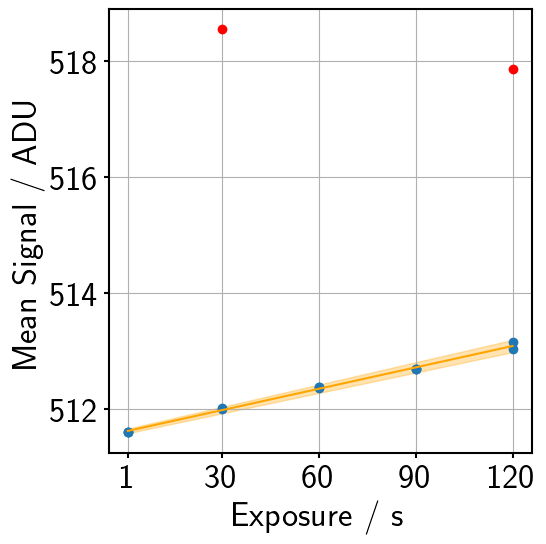

In [19]:
# Dark current fit with the outliers highlighted

#Data directory
dir = '../Data/2024-04-19/DarkCurrent/'
#These exposures were done at a gain of 4030 to increase the resolution and allow a signal detection in reasonable time

temp = -5 #Temperature in Celsius

### Computations ###

#Find the dark current for the given temperature

dirName = dir + str(temp) + 'C/'

#Extract data
files = os.listdir(dirName)
for f in files: #Skip non-fits files and directories
    if not f.endswith('.fits'):
        files.remove(f)

DataPoints = np.zeros((len(files),2))


for i, filename in enumerate(files):
    #if not filename.endswith('.fits'): continue #Skip non-fits files and directories
    with fits.open(dirName + filename) as hdul:
        DataPoints[i, 0] = hdul[0].header['EXPTIME']
        DataPoints[i, 1] = np.mean(hdul[0].data)

#Fit a line to the data
coeff, cov = np.polyfit(DataPoints[:,0], DataPoints[:,1], 1, cov=True)
std_err = np.sqrt(np.diag(cov))

#Calculate confidence intervals
t = stats.t.ppf(0.975, len(DataPoints) - 2)
conf_int = t * std_err

#Read outliers if temperature is -5
if temp == -5:
    outliers = np.zeros((2,2))
    dirName += 'Outliers/'
    files = os.listdir(dirName)
    for i, filename in enumerate(files):
        with fits.open(dirName + filename) as hdul:
            outliers[i, 0] = hdul[0].header['EXPTIME']
            outliers[i, 1] = np.mean(hdul[0].data)


#Prepare functions
x = np.linspace(1, 120, 100)
poly_function = np.poly1d(coeff)
y = poly_function(x)
y_up = np.poly1d(coeff + conf_int)(x)
y_down = np.poly1d(coeff - conf_int)(x)

#Plot
fig, ax = plt.subplots(layout='constrained' ,figsize=(6, 6))

#Residuals -- Commented out for better visibility on small plot
#ax2 = ax.twinx()
#ax2.bar(DataPoints[:,0], poly_function(DataPoints[:,0]) - DataPoints[:,1], width=5, alpha=0.1, color='black')
#ax2.set_ylabel('Residuals / ADU')
#ax2.plot([0,120],[0, 0], color='black', alpha=0.3, linestyle='dotted')

#Data points and fit
ax.fill_between(x, y_up, y_down, color='orange', alpha=0.3)
ax.plot(DataPoints[:,0], DataPoints[:,1], linestyle='', marker='o')
ax.plot(x,y, linestyle='-', color='orange')

#Outliers
if temp == -5:
    ax.plot(outliers[:,0], outliers[:,1], linestyle='', marker='o', color='red')

#Labels
ax.grid()
ax.set_xticks([1, 30, 60, 90, 120])
ax.set_xlabel('Exposure [s]')
ax.set_ylabel('Mean Signal [ADU]')
plt.tight_layout()

#Save and show
if temp == -5:
    plt.savefig('../Results/DarkCurr-Fit-Outliers--5C.' + output_type, format=output_type)
else:
    plt.savefig('../Results/DarkCurr-Fit-' + str(temp) + 'C.' + output_type, format=output_type)
plt.show()

## Read-out Noise

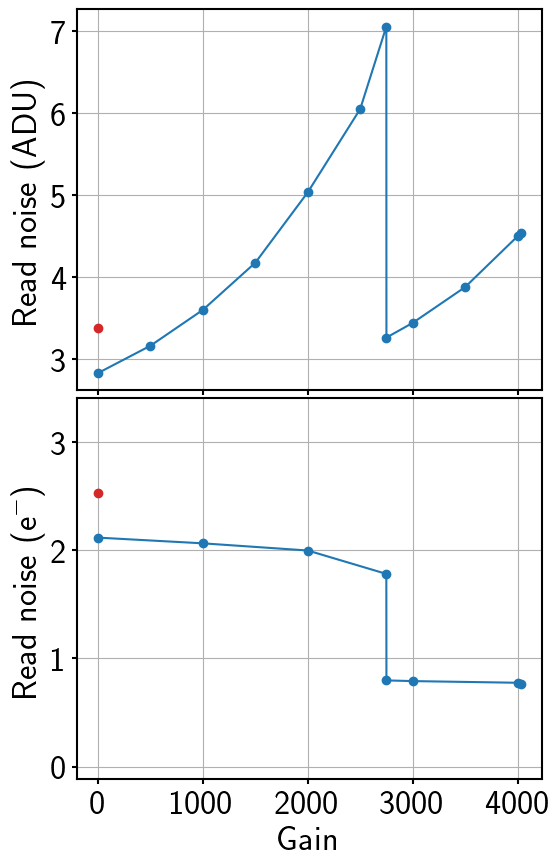

In [2]:
# Read-out noise
# Recreation of the plots already in the development notebook, this time formated nicely

#Read computed read noise
results = np.load('../Results/gain-readNoise-CI-ADU.npy')
gainVal = results[0]
readNoise = results[1]
RN_CI = results[2]

# General plot structure
fig = plt.figure(figsize=(6, 10))
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1])

#Plot in ADUs
ax1 = plt.subplot(gs[0])
#Main measurement series
#ax1.fill_between(gainVal[1:], readNoise[1:] - RN_CI[1:], readNoise[1:] + RN_CI[1:], color='tab:blue', alpha=0.3)
ax1.plot(gainVal[1:], readNoise[1:], '-o', color='tab:blue')
#Extra gain zero measurement
ax1.errorbar(gainVal[0], readNoise[0], yerr=RN_CI[0], fmt='o', color='tab:red')
ax1.set_ylabel('Read noise (ADU)', fontweight='bold')
ax1.grid()

#Conversion and plotting in e-

OSG_vec = np.load('../Results/Gain-OSG-up-down.npy')
OSG = OSG_vec[1]
OSG_gainrange = OSG_vec[0]
OSG_up = OSG_vec[2]
OSG_down = OSG_vec[3]

RN_electrons = np.empty(len(OSG_gainrange) + 1) #+1 for the two gain zero measurements
RN_CI_electrons_up = np.empty(len(OSG_gainrange) + 1)
RN_CI_electrons_down = np.empty(len(OSG_gainrange) + 1)

indices = np.nonzero(np.in1d(gainVal, OSG_gainrange))[0] #Indices of the OSG values in the gain values
OSG = np.concatenate(([OSG[0]], OSG)) #Duplicate the gain zero value for the two measurements
OSG_up = np.concatenate(([OSG_up[0]], OSG_up))
OSG_down = np.concatenate(([OSG_down[0]], OSG_down))


for i, index in enumerate(indices):
    RN_electrons[i] = readNoise[index] * OSG[i]
    RN_CI_electrons_up[i] = RN_CI[index] * OSG_up[i]
    RN_CI_electrons_down[i] = RN_CI[index] * OSG_down[i]

#Plot in e-
ax2 = plt.subplot(gs[1], sharex=ax1)
plt.setp(ax1.get_xticklabels(), visible=False)
#Main measurement series
#ax2.fill_between(OSG_gainrange, RN_electrons[1:] - RN_CI_electrons_down[1:], RN_electrons[1:] + RN_CI_electrons_up[1:], color='tab:blue', alpha=0.3)
ax2.plot(OSG_gainrange, RN_electrons[1:], '-o', color='tab:blue')
#Extra gain zero measurement
ax2.errorbar(OSG_gainrange[0], RN_electrons[0], yerr=[[RN_CI_electrons_down[0]], [RN_CI_electrons_up[0]]], fmt='o', color='tab:red')
ax2.set_xlabel('Gain', fontweight='bold')
ax2.set_ylabel('Read noise (e$^-$)', fontweight='bold')
ax2.set_xticks([0, 1000, 2000, 3000, 4000])
ax2.grid()

# remove vertical gap between subplots
plt.subplots_adjust(hspace=.02)

plt.margins(y=0.5)

#Save and show
plt.savefig('../Results/ReadNoise-Gain.' + output_type, format=output_type)
plt.show()

## FWC

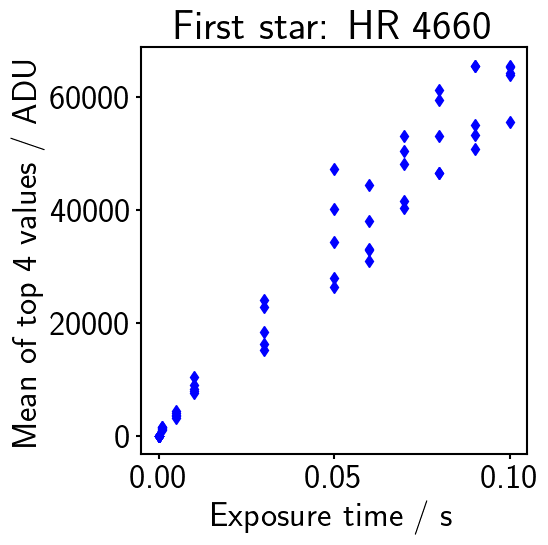

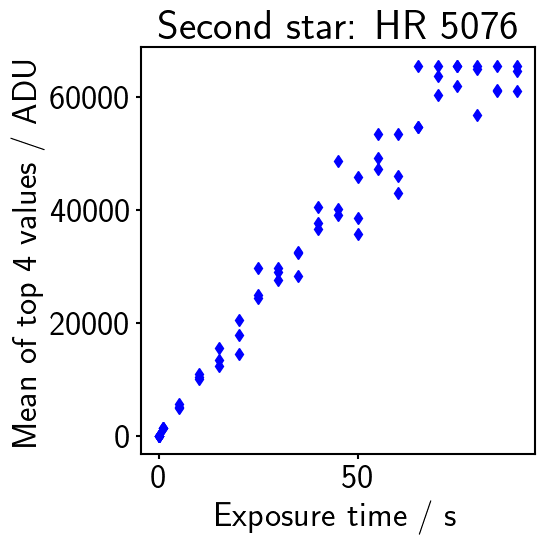

In [2]:
# Plots for examples of full-well capacity

#First star data:
dirFirst = '../Data/2024-03-19/FWCapVSGain-Megrez/'

#Second star data:
dirSecond = '../Data/2024-05-09/FWCap/'

#Gain value to be plotted
gain = 0

expNum = 63 #Maximal number of exposure per gain value, actually not constant in my data -> produces points at (0,0)

### Computations ###

dirList = [dirFirst, dirSecond]

signal = np.zeros((2, expNum, 2)) #First dimension is the star, the second is the individual files and the third is for the mean signal and the exp time

for i, dir in enumerate(dirList):
    files = os.listdir(dir+'Gain'+str(gain))
    for j in range(len(files)):
        with fits.open(dir+'Gain'+str(gain)+'/'+files[j]) as hdu:
            data = hdu[0].data
            data = np.sort(data, axis=None)
            signal[i,j,0] = np.mean(data[-4]) #Take the mean of the top 4 pixels
            signal[i,j,1] = hdu[0].header['EXPTIME']

#Plot the results
names = ['First star: HR 4660', 'Second star: HR 5076']
for i in range(2):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.plot(signal[i,:,1], signal[i,:,0], 'bd')
    ax.set_xlabel('Exposure time / s', fontweight='bold')
    ax.set_ylabel('Mean of top 4 values / ADU', fontweight='bold')
    ax.set_title(names[i], fontweight='bold')
    plt.tight_layout()
    plt.savefig('../Results/FWCap-Star' + str(i+1) + '-Gain' + str(gain) + '.' + output_type, format=output_type)
    plt.show()

# Speckle Imaging

In [85]:
# Functions needed for the following cells
def fit_stddev(data):
    '''Fits a 2D Gaussian to the data and returns the sum of the standard deviations in x and y directions.'''

    height, width = data.shape

    model = models.Gaussian2D(amplitude=2000, x_mean=width/2, y_mean=height/2, x_stddev=10, y_stddev=10, theta=0) #Initial guess
    fitter = fitting.LevMarLSQFitter()

    x, y = np.meshgrid(np.arange(data.shape[1]), np.arange(data.shape[0]))
    p_init = model
    p_fit = fitter(p_init, x, y, data)

    return np.mean((p_fit.x_stddev.value, p_fit.y_stddev.value))

def shift_array(arr):
    '''Returns the array shifted so that the maximum value is in the center. Supports multiple dimensions.'''
    
    max_index = np.unravel_index(np.argmax(arr), arr.shape)
    center_index = tuple(dim // 2 for dim in arr.shape)
    shift_amount = tuple(center - max_idx for center, max_idx in zip(center_index, max_index))
    shifted_arr = np.roll(arr, shift_amount, axis=(0, 1))
    return shifted_arr

def fit_for_shorts(data, stddevs, percentages):
    '''Returns a vector of the standard deviations of Gaussian fits on the median of the data for the given percentages, as well as for the whole data shifted and raw.'''

    results = np.zeros((len(percentages) + 2)) #+2 for the median of all data and the median of all shifted data

    #Percentages fit
    for i, percentage in enumerate(percentages):
        indices = np.argsort(stddevs)
        indices = indices[:int(percentage*len(indices))]
        result = np.zeros(data[0].shape)
        shifted_data = ([])
        for j in indices:
            shifted_data.append(shift_array(data[j]))
        result = np.median(shifted_data, axis=0)
        results[i] = fit_stddev(result)

    #All data, shifted and not
    shift_data = np.empty(data.shape)
    for i in range(len(data)):
        shift_data[i] = shift_array(data[i])
    results[-2] = fit_stddev(np.median(shift_data, axis=0))
    results[-1] = fit_stddev(np.median(data, axis=0))

    return results

def fit_for_longs(data, sep=0):
    '''Returns the mean of the standard deviation of Gaussian fits on the data.'''

    results = np.zeros(len(data))
    for i in range(len(data)):
        results[i] = fit_stddev(data[i])
    if not sep==0: print('Mean stddev for first batch of exposures:', np.mean(results[:sep]))
    print('Mean stddev for second batch of exposures:', np.mean(results[sep:]))
    return

def make_master_dark(dir, gain, x_offset, y_offset, width, height):
    '''Creates a master dark from the 5 dark files in the given directory corresponding to the given gain. The darks are cropped to the given dimensions.'''
    darkfiles = []
    for i in range(5):
        darkfiles.append('BiasGain' + str(gain) + '_000' + str(i) + '.fits')
    datadark = np.zeros((len(darkfiles), height, width))

    #Read the dark files
    for i, filename in enumerate(darkfiles):
        with fits.open(dir + filename) as hdul:
            datadark[i] = hdul[0].section[y_offset:y_offset+height, x_offset:x_offset+width]

    #Create the master dark
    return np.median(datadark, axis=0)


## Alkaid

In [28]:
# Plotting for speckle imaging: Alkaid reference

#Data directory for short exposures
dirShort = '../Data/2024-05-09/Alkaid/ShortExp/'
#Data directory for long exposures
dirLong = '../Data/2024-05-09/Alkaid/LongExp/'

#Subframe offsets
x_offset = 5800
y_offset = 4155

#Data directory for darks
dirDark = '../Data/2024-03-19/BiasVSGain/'

#Gain values (short and long exposures)
gainS = 4030
gainL = 0

#Paths to processed results
stddevs = np.load('../Data/ProcessedData/Alkaid-stddevs.npy')

#Percentages to be plotted
percentages = [0.01, 0.05, 0.1, 0.5]


#### Computations ####

## Short exposures

#List files
files = os.listdir(dirShort)

#Determine the shape of the frames
with fits.open(dirShort + '/' + files[0]) as hdul:
    height = hdul[0].header['NAXIS2']
    width = hdul[0].header['NAXIS1']

#Make a master dark
masterDark = make_master_dark(dirDark, gainS, x_offset, y_offset, width, height)

#Read the data
short_data = np.zeros((len(files), height, width))
for i, file in tqdm(enumerate(files), total=len(files), desc='Reading short-exp data'):
    with fits.open(dirShort + file) as hdul:
        short_data[i] = hdul[0].data - masterDark
short_data = short_data.clip(min=1) #Remove negative values

results_short = fit_for_shorts(short_data, stddevs, percentages)

## Long exposures

#List files
files = os.listdir(dirLong)

#Make a master dark
masterDark = make_master_dark(dirDark, gainL, x_offset, y_offset, width, height) #While technically using the wrong exposure time, this is good enough due to the low dark current

#Read the data
long_data = np.zeros((len(files), height, width))
for i, file in enumerate(files):
    with fits.open(dirLong + file) as hdul:
        long_data[i] = hdul[0].data - masterDark

fit_for_longs(long_data, 5)


Reading short data: 100%|██████████| 20000/20000 [00:20<00:00, 967.86it/s] 


Mean stddev for 5s exposures: 17.379401500722903
Mean stddev for 1s exposures: 12.073867628572113


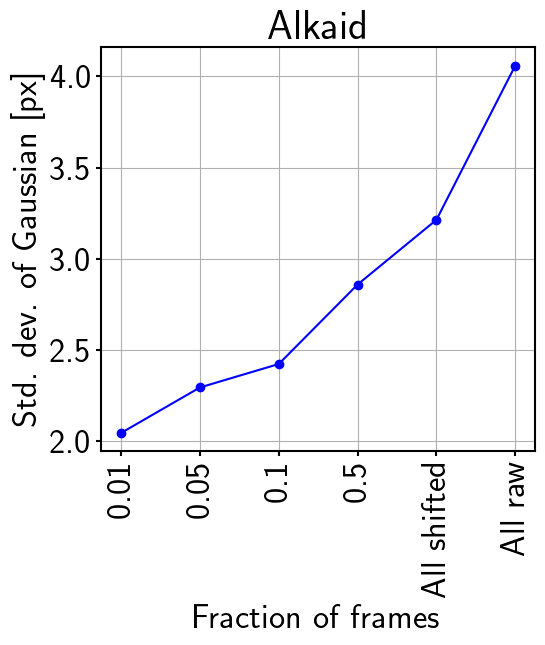

In [27]:
#### Plotting ####

#Plot
fig, ax = plt.subplots(figsize=(6, 7))
ax.plot(percentages + ['All shifted', 'All raw'], results_short, '-ob')
ax.tick_params(axis='x', rotation=90)
ax.set_yticks([2, 2.5, 3, 3.5, 4])
ax.set_xlabel('Fraction of frames', fontweight='bold')
ax.set_ylabel('Std. dev. of Gaussian [px]', fontweight='bold')
ax.set_title('Alkaid', fontweight='bold')
ax.grid()
plt.tight_layout()
plt.savefig('../Results/Speckle-Alkaid.' + output_type, format=output_type)
plt.show()

## Dubhe + Heze

In [86]:
# Directories for Dubhe data
dirDubheS = '../Data/2024-03-19/Dubhe/LIGHT/C/DubheShort'
dirDubheL = '../Data/2024-03-19/Dubhe/LIGHT/C/DubheLong'

#Subframe offsets for Dubhe
x_off_Dubhe = 5800
y_off_Dubhe = 4155

# Directories for Heze data
dirHezeS = '../Data/2024-03-19/Heze/HezeShort'
dirHezeL = '../Data/2024-03-19/Heze/HezeLong'

#Subframe offsets for Heze
x_off_Heze = 5910
y_off_Heze = 4275

# Data directory for darks
dirDark = '../Data/2024-03-19/BiasVSGain/'

# Gain values
gainS = 4030
gainL = 0

# Paths to processed results
stddevsDubhe = np.load('../Data/ProcessedData/Dubhe-stddevs.npy')
stddevsHeze = np.load('../Data/ProcessedData/Heze-stddevs.npy')

# Percentages to be plotted
percentages = [0.01, 0.05, 0.1, 0.5]


#### Computations ####

## Dubhe - Short exposures

#List files
files = os.listdir(dirDubheS)

#Determine the shape of the frames
with fits.open(dirDubheS + '/' + files[0]) as hdul:
    height = hdul[0].header['NAXIS2']
    width = hdul[0].header['NAXIS1']

#Make a master dark
masterDark = make_master_dark(dirDark, gainS, x_off_Dubhe, y_off_Dubhe, width, height)

#Read the data
short_data = np.zeros((len(files), height, width))

for i, file in tqdm(enumerate(files), total=len(files), desc='Reading Dubhe short-exp data'):
    with fits.open(dirDubheS + '/' + file) as hdul:
        short_data[i] = hdul[0].data - masterDark

short_data = short_data.clip(min=1) #Remove negative values

results_short_dubhe = fit_for_shorts(short_data, stddevsDubhe, percentages)

## Dubhe - Long exposures

#List files
files = os.listdir(dirDubheL)

#Make a master dark
masterDark = make_master_dark(dirDark, gainL, x_off_Dubhe, y_off_Dubhe, width, height) #While technically using the wrong exposure time, this is good enough due to the low dark current

#Read the data
long_data = np.zeros((len(files), height, width))
for i, file in enumerate(files):
    with fits.open(dirDubheL + '/' + file) as hdul:
        long_data[i] = hdul[0].data - masterDark

fit_for_longs(long_data, 1)

## Heze - Short exposures

#List files
files = os.listdir(dirHezeS)

#Determine the shape of the frames
with fits.open(dirHezeS + '/' + files[0]) as hdul:
    height = hdul[0].header['NAXIS2']
    width = hdul[0].header['NAXIS1']

#Make a master dark
masterDark = make_master_dark(dirDark, gainS, x_off_Heze, y_off_Heze, width, height)

#Read the data
short_data = np.zeros((len(files), height, width))

for i, file in tqdm(enumerate(files), total=len(files), desc='Reading Heze short-exp data'):
    with fits.open(dirHezeS + '/' + file) as hdul:
        short_data[i] = hdul[0].data - masterDark

short_data = short_data.clip(min=1) #Remove negative values

results_short_heze = fit_for_shorts(short_data, stddevsHeze, percentages)

## Heze - Long exposures

#List files
files = os.listdir(dirHezeL)

#Make a master dark
masterDark = make_master_dark(dirDark, gainL, x_off_Heze, y_off_Heze, width, height) #While technically using the wrong exposure time, this is good enough due to the low dark current

#Read the data
long_data = np.zeros((len(files), height, width))

for i, file in enumerate(files):
    with fits.open(dirHezeL + '/' + file) as hdul:
        long_data[i] = hdul[0].data - masterDark

fit_for_longs(long_data)

Reading Dubhe short-exp data: 100%|██████████| 20000/20000 [00:17<00:00, 1132.84it/s]


Mean stddev for first batch of exposures: 4.415585518618318
Mean stddev for second batch of exposures: 3.59971768323838


Reading Heze short-exp data: 100%|██████████| 20000/20000 [00:17<00:00, 1158.77it/s]


Mean stddev for second batch of exposures: 5.169420565049776


<>:11: SyntaxWarning: invalid escape sequence '\&'
<>:11: SyntaxWarning: invalid escape sequence '\&'
/tmp/ipykernel_13282/1049961840.py:11: SyntaxWarning: invalid escape sequence '\&'
  ax.set_title('Dubhe \& Heze', fontweight='bold')


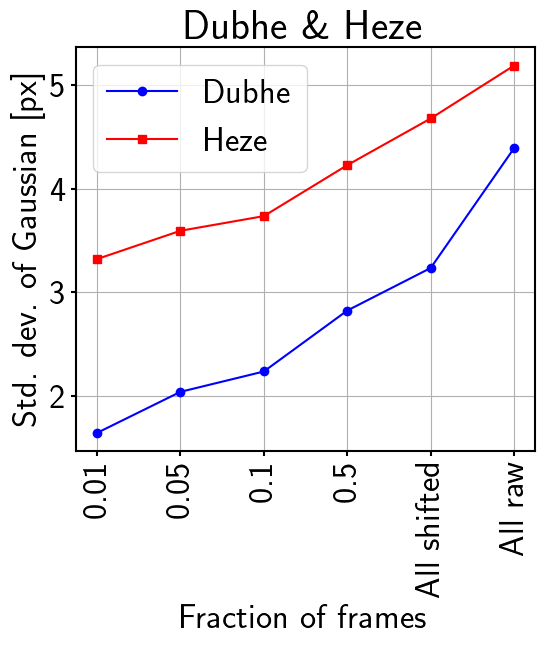

In [82]:
#### Plotting ####

#Plot
fig, ax = plt.subplots(figsize=(6, 7))
ax.plot(percentages + ['All shifted', 'All raw'], results_short_dubhe, '-ob', label='Dubhe')
ax.plot(percentages + ['All shifted', 'All raw'], results_short_heze, '-sr', label='Heze')
ax.legend(loc='best')
ax.tick_params(axis='x', rotation=90)
ax.set_xlabel('Fraction of frames', fontweight='bold')
ax.set_ylabel('Std. dev. of Gaussian [px]', fontweight='bold')
ax.set_title('Dubhe \& Heze', fontweight='bold')
ax.grid()
plt.tight_layout()
plt.savefig('../Results/Speckle-DubheHeze.' + output_type, format=output_type)
plt.show()

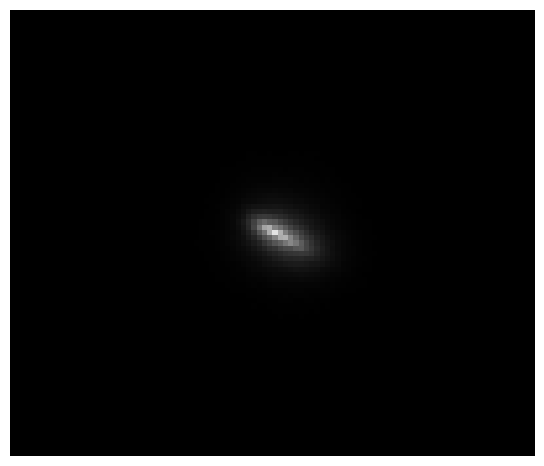

In [89]:
## Showing the "flattened" Heze

percentage = 0.01

indices = np.argsort(stddevsHeze)
indices = indices[:int(percentage*len(indices))]
result = np.zeros(short_data[0].shape)
shifted_data = ([])
for j in indices:
    shifted_data.append(shift_array(short_data[j]))
result = np.median(shifted_data, axis=0)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(result, cmap='gray', vmax=1200)
ax.axis('off')
plt.tight_layout()
plt.savefig('../Results/Heze-Flattened.' + output_type, format=output_type)
plt.show()

## Zet Her

In [42]:
#Directory for short exposures
dirShort = '../Data/2024-05-09/ZetHer/ShortExp/'
#Directory for long exposures
dirLong = '../Data/2024-05-09/ZetHer/LongExp/'

#Subframe offsets
x_offset = 5800
y_offset = 4155

#Data directory for darks
dirDark = '../Data/2024-03-19/BiasVSGain/'

#Gain values (short and long exposures)
gainS = 4030
gainL = 0

#Paths to processed results
stddevs = np.load('../Data/ProcessedData/ZetHer-stddevs.npy')

#Percentages to be plotted
percentages = [0.01, 0.05, 0.1, 0.5]

#### Computations ####

## Short exposures

#List files
files = os.listdir(dirShort)

#Determine the shape of the frames
with fits.open(dirShort + '/' + files[0]) as hdul:
    height = hdul[0].header['NAXIS2']
    width = hdul[0].header['NAXIS1']

#Make a master dark
masterDark = make_master_dark(dirDark, gainS, x_offset, y_offset, width, height)

#Read the data
short_data = np.zeros((len(files), height, width))

for i, file in tqdm(enumerate(files), total=len(files), desc='Reading short-exp data'):
    with fits.open(dirShort + file) as hdul:
        short_data[i] = hdul[0].data - masterDark

short_data = short_data.clip(min=1) #Remove negative values

results_short = fit_for_shorts(short_data, stddevs, percentages)

## Long exposures

#List files
files = os.listdir(dirLong)

#Determine the shape of the frames (This star has bigger long frames)
with fits.open(dirLong + '/' + files[0]) as hdul:
    height = hdul[0].header['NAXIS2']
    width = hdul[0].header['NAXIS1']

#Make a master dark
masterDark = make_master_dark(dirDark, gainL, x_offset, y_offset, width, height) #While technically using the wrong exposure time, this is good enough due to the low dark current

#Read the data
long_data = np.zeros((len(files), height, width))

for i, file in enumerate(files):
    with fits.open(dirLong + '/' + file) as hdul:
        long_data[i] = hdul[0].data - masterDark

fit_for_longs(long_data, 5)

Reading short-exp data: 100%|██████████| 32767/32767 [00:28<00:00, 1145.34it/s]


Mean stddev for first batch of exposures: 8.604458260972015
Mean stddev for second batch of exposures: 13.379834101294865


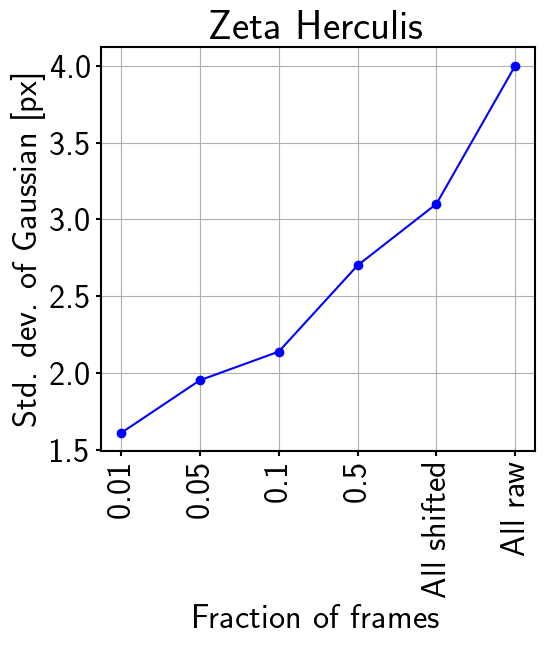

In [44]:
#### Plotting ####

#Plot
fig, ax = plt.subplots(figsize=(6, 7))
ax.plot(percentages + ['All shifted', 'All raw'], results_short, '-ob')
ax.tick_params(axis='x', rotation=90)
ax.set_yticks([1.5, 2, 2.5, 3, 3.5, 4])
ax.set_xlabel('Fraction of frames', fontweight='bold')
ax.set_ylabel('Std. dev. of Gaussian [px]', fontweight='bold')
ax.set_title('Zeta Herculis', fontweight='bold')
ax.grid()
plt.tight_layout()
plt.savefig('../Results/Speckle-ZetHer.' + output_type, format=output_type)
plt.show()

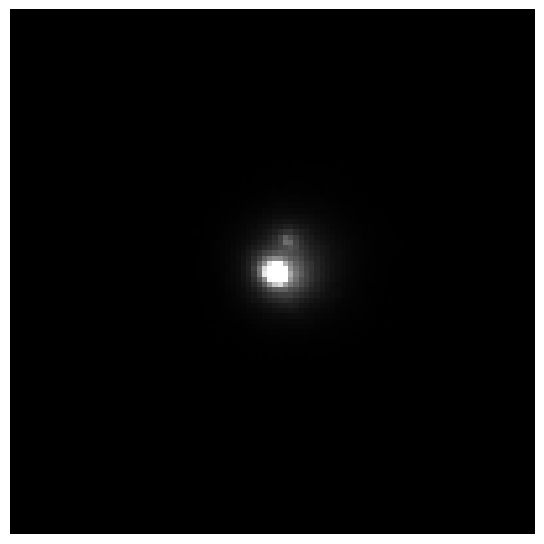

In [83]:
## Showing the companion star

percentage = 0.01

indices = np.argsort(stddevs)
indices = indices[:int(percentage*len(indices))]
result = np.zeros(short_data[0].shape)
shifted_data = ([])
for j in indices:
    shifted_data.append(shift_array(short_data[j]))
result = np.median(shifted_data, axis=0)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(result, cmap='gray', vmax=1200)
ax.axis('off')
plt.tight_layout()
plt.savefig('../Results/ZetHer-Companion.' + output_type, format=output_type)
plt.show()

In [53]:
#np.save('../Results/ZetHer-Companion.npy', result)

In [81]:
# Coordinates of companion star: 52, 44
distance_px = np.sqrt((2)**2 + (6)**2)
distance_arcsec = 0.225 * distance_px #0.225 arcsec per pixel

print('Distance in pixels:', distance_px)
print('Distance in arcsec:', distance_arcsec)

Distance in pixels: 6.324555320336759
Distance in arcsec: 1.4230249470757708


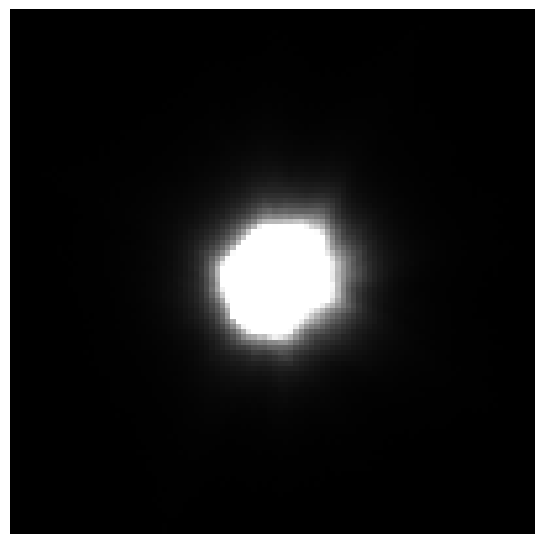

In [96]:
# For comparison, plot a long exposure of the system

filename = '../Data/2024-05-09/ZetHer/LongExp/ZetHer_0000.fits'

with fits.open(filename) as hdul:
    data = hdul[0].section[265:365, 270:370]

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(data, cmap='gray')
ax.axis('off')
plt.tight_layout()
plt.savefig('../Results/ZetHer-Long.' + output_type, format=output_type)
plt.show()